Example of vanna-ai

https://vanna.ai

The code create a query, execute the query and create a plot.

In [26]:
!pip install vanna

In [27]:
import vanna as vn

In [28]:
!pip install vanna

from vanna.remote import VannaDefault
vn = VannaDefault(model='chinook', api_key='9b4dc7af2fbc4bd89385e34dc8fefc48')
vn.connect_to_sqlite('https://vanna.ai/Chinook.sqlite')

SELECT a.ArtistId, a.Name, SUM(il.Quantity) AS TotalSales
FROM Artist a
INNER JOIN Album al ON a.ArtistId = al.ArtistId
INNER JOIN Track t ON al.AlbumId = t.AlbumId
INNER JOIN InvoiceLine il ON t.TrackId = il.TrackId
GROUP BY a.ArtistId, a.Name
ORDER BY TotalSales DESC
LIMIT 10;
   ArtistId                     Name  TotalSales
0        90              Iron Maiden         140
1       150                       U2         107
2        50                Metallica          91
3        22             Led Zeppelin          87
4       113  Os Paralamas Do Sucesso          45
5        58              Deep Purple          44
6        82            Faith No More          42
7       149                     Lost          41
8        81             Eric Clapton          40
9       124                   R.E.M.          39


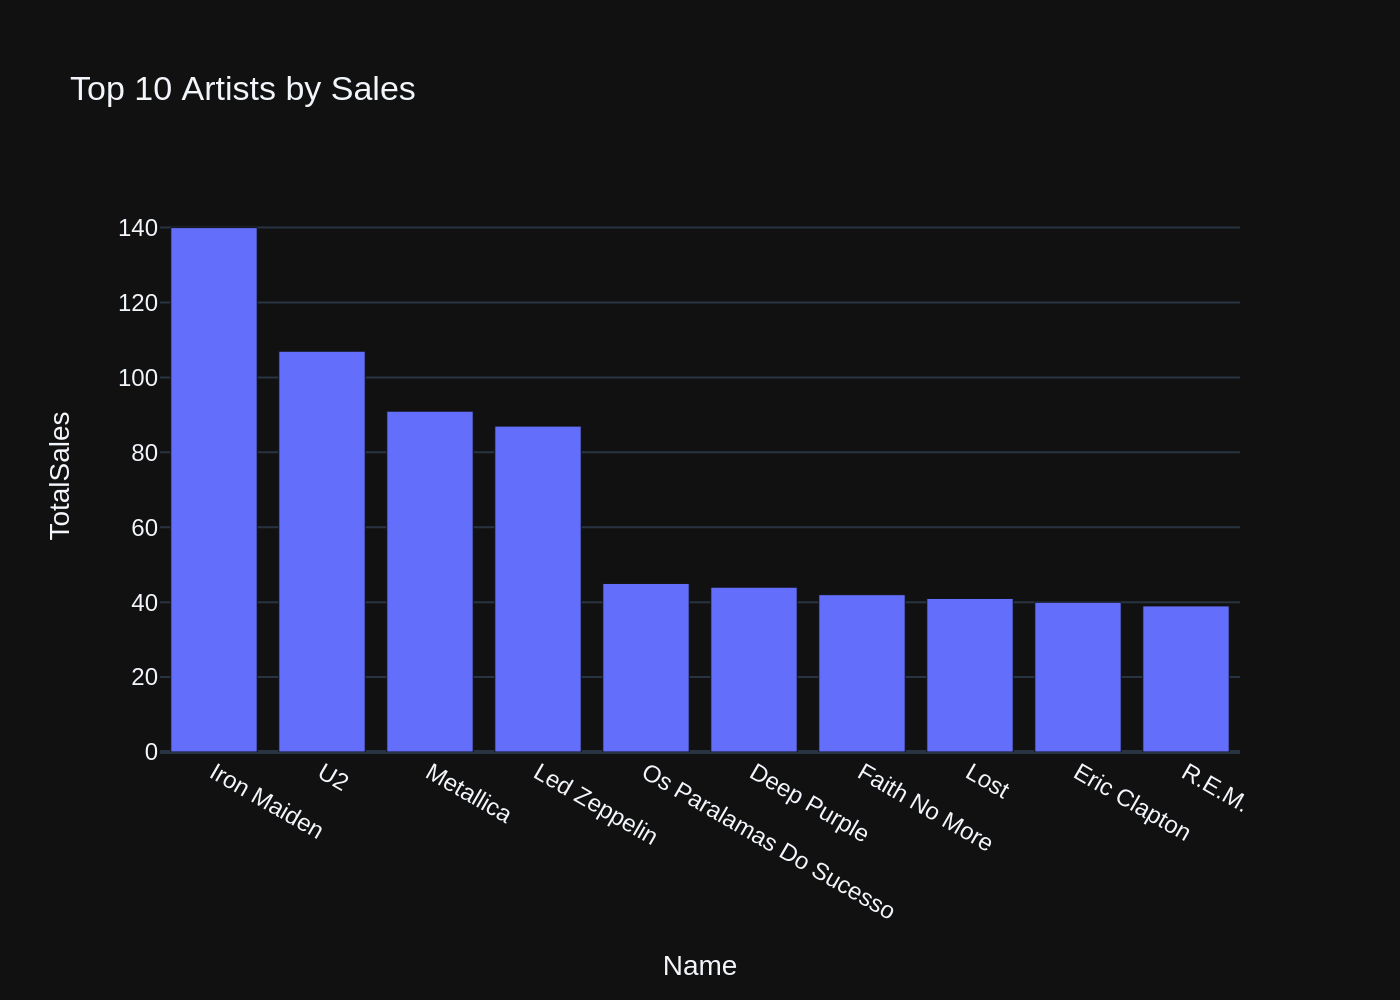

In [29]:
vn.ask('What are the top 10 artists by sales?')

SELECT a.ArtistId, a.Name, SUM(il.Quantity) AS TotalSales
FROM Artist a
INNER JOIN Album al ON a.ArtistId = al.ArtistId
INNER JOIN Track t ON al.AlbumId = t.AlbumId
INNER JOIN InvoiceLine il ON t.TrackId = il.TrackId
GROUP BY a.ArtistId, a.Name
ORDER BY TotalSales
LIMIT 10;
   ArtistId                                               Name  TotalSales
0       157                                     Dread Zeppelin           1
1       198                             Habib Koité and Bamada           1
2       200                                         The Posies           1
3       201                       Luciana Souza/Romero Lubambo           1
4       208                   English Concert & Trevor Pinnock           1
5       212                                           Yo-Yo Ma           1
6       213                          Scholars Baroque Ensemble           1
7       214  Academy of St. Martin in the Fields & Sir Nevi...           1
8       217  Royal Philharmonic Orchestra & Sir Th

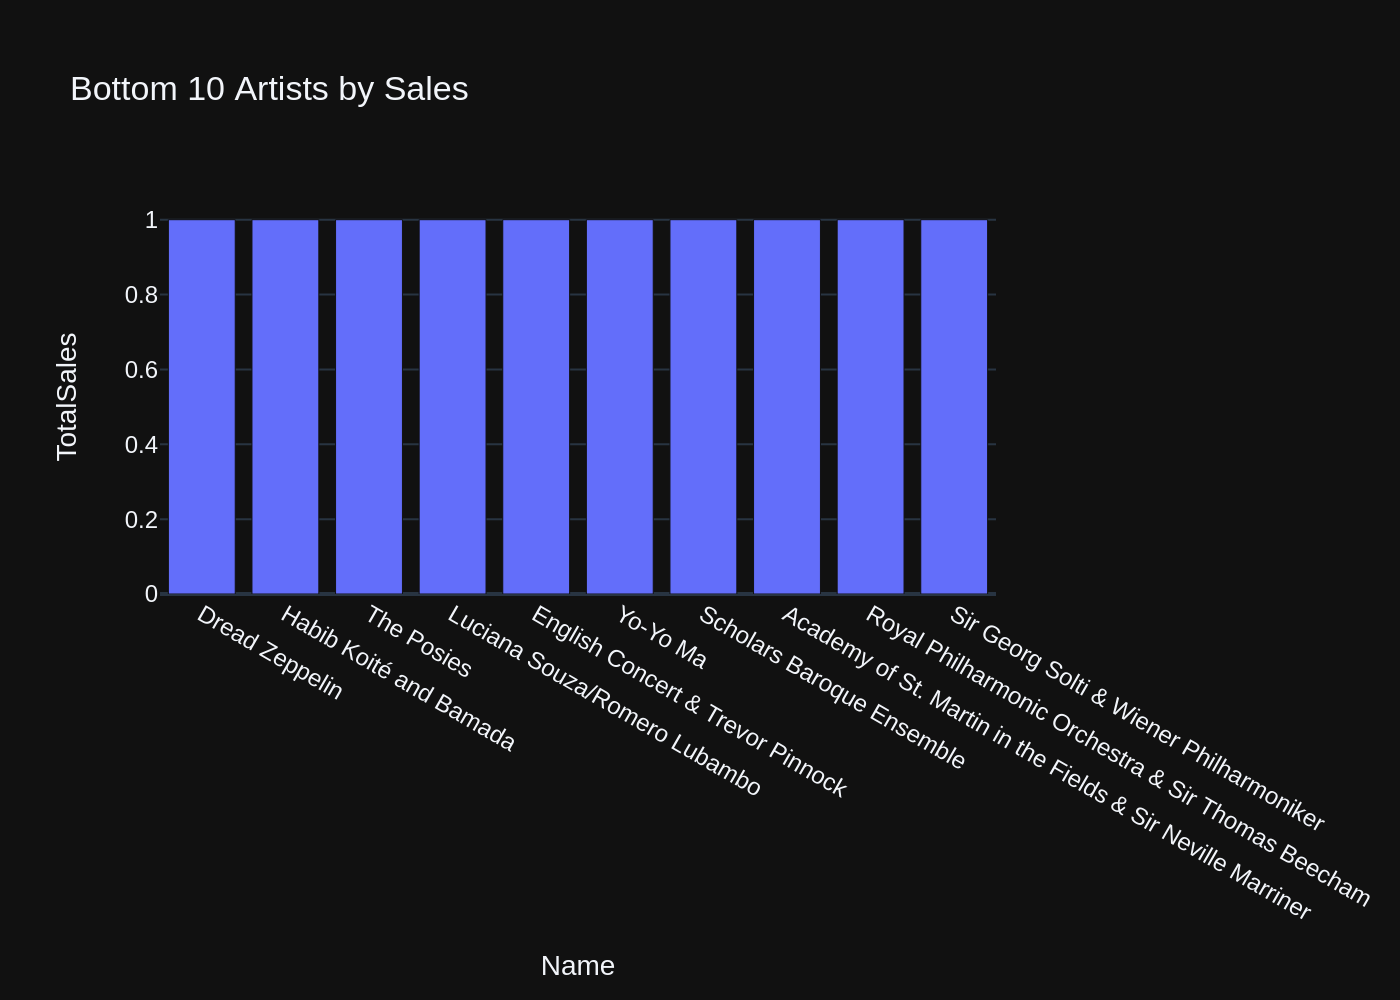

In [30]:
vn.ask('What are the botton 10 artists by sales?')



---



# Training with our DB

To train the model with our database we need to register on the website with our email.

In [31]:
# Import packages
import pandas as pd
import vanna as vn

In [32]:
# Get credentials
# vanna-ai sent a code to your gmail account to connect
api_key = vn.get_api_key('my-email@example.com')
vn.set_api_key(api_key)

Check your email for the code and enter it here: WO3EGG


To add the model name we need go to https://vanna.ai/account/profile?new-model=true and create our model name.

In [33]:
vanna_model_name = "amazon_food_reviews_p" # Put a unique name here
vn = VannaDefault(model=vanna_model_name, api_key=api_key)

Loading the database

Information about the DB

https://www.kaggle.com/datasets/snap/amazon-fine-food-reviews?select=database.sqlite

In [34]:
vn.connect_to_sqlite('amazon_food_reviews.sqlite')

In [35]:
df_ddl = vn.run_sql("SELECT type, sql FROM sqlite_master WHERE sql is not null")

for ddl in df_ddl['sql'].to_list():
  vn.train(ddl=ddl)

Adding ddl: CREATE TABLE Reviews (
    Id INTEGER PRIMARY KEY,
    ProductId TEXT,
    UserId TEXT,
    ProfileName TEXT,
    HelpfulnessNumerator INTEGER,
    HelpfulnessDenominator INTEGER,
    Score INTEGER,
    Time INTEGER,
    Summary TEXT,
    Text TEXT)


In [36]:
# The following are methods for adding training data. Make sure you modify the examples to match your database.

# DDL statements are powerful because they specify table names, colume names, types, and potentially relationships
vn.train(ddl="""
    CREATE TABLE IF NOT EXISTS my-table (
        id INT PRIMARY KEY,
        name VARCHAR(100),
        age INT
    )
""")

# Sometimes you may want to add documentation about your business terminology or definitions.
#vn.train(documentation="Our business defines OTIF score as the percentage of orders that are delivered on time and in full")

# You can also add SQL queries to your training data. This is useful if you have some queries already laying around. You can just copy and paste those from your editor to begin generating new SQL.
#vn.train(sql="SELECT * FROM my-table WHERE name = 'John Doe'")

Adding ddl: 
    CREATE TABLE IF NOT EXISTS my-table (
        id INT PRIMARY KEY,
        name VARCHAR(100),
        age INT
    )



'19626-ddl'

SELECT Summary FROM Reviews ORDER BY Score ASC LIMIT 10
                                Summary
0                     Not as Advertised
1  My Cats Are Not Fans of the New Food
2                       Nasty No flavor
3                         Don't like it
4                        stale product.
5  Warning!  WARNING!  -ALCOHOL SUGARS!
6                         No Tea Flavor
7                                   Bad
8                         Rip off Price
9             Tasteless but low calorie


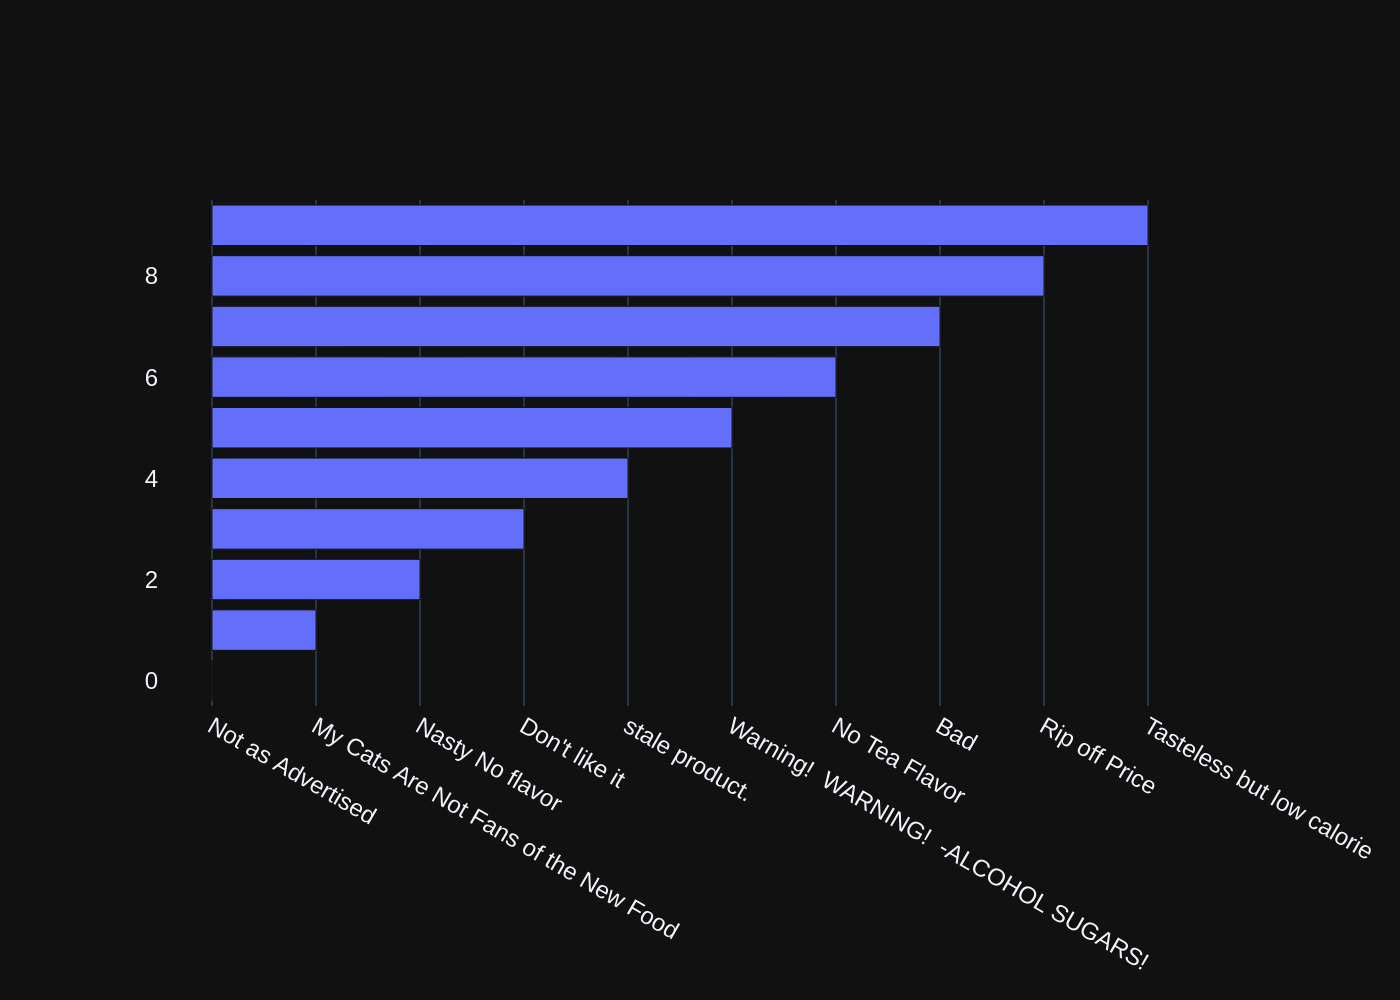

In [37]:
vn.ask(question="List the 10 worst Summaries")